# Paletas de colores

In [ ]:
from matplotlib import colormaps
list(colormaps)

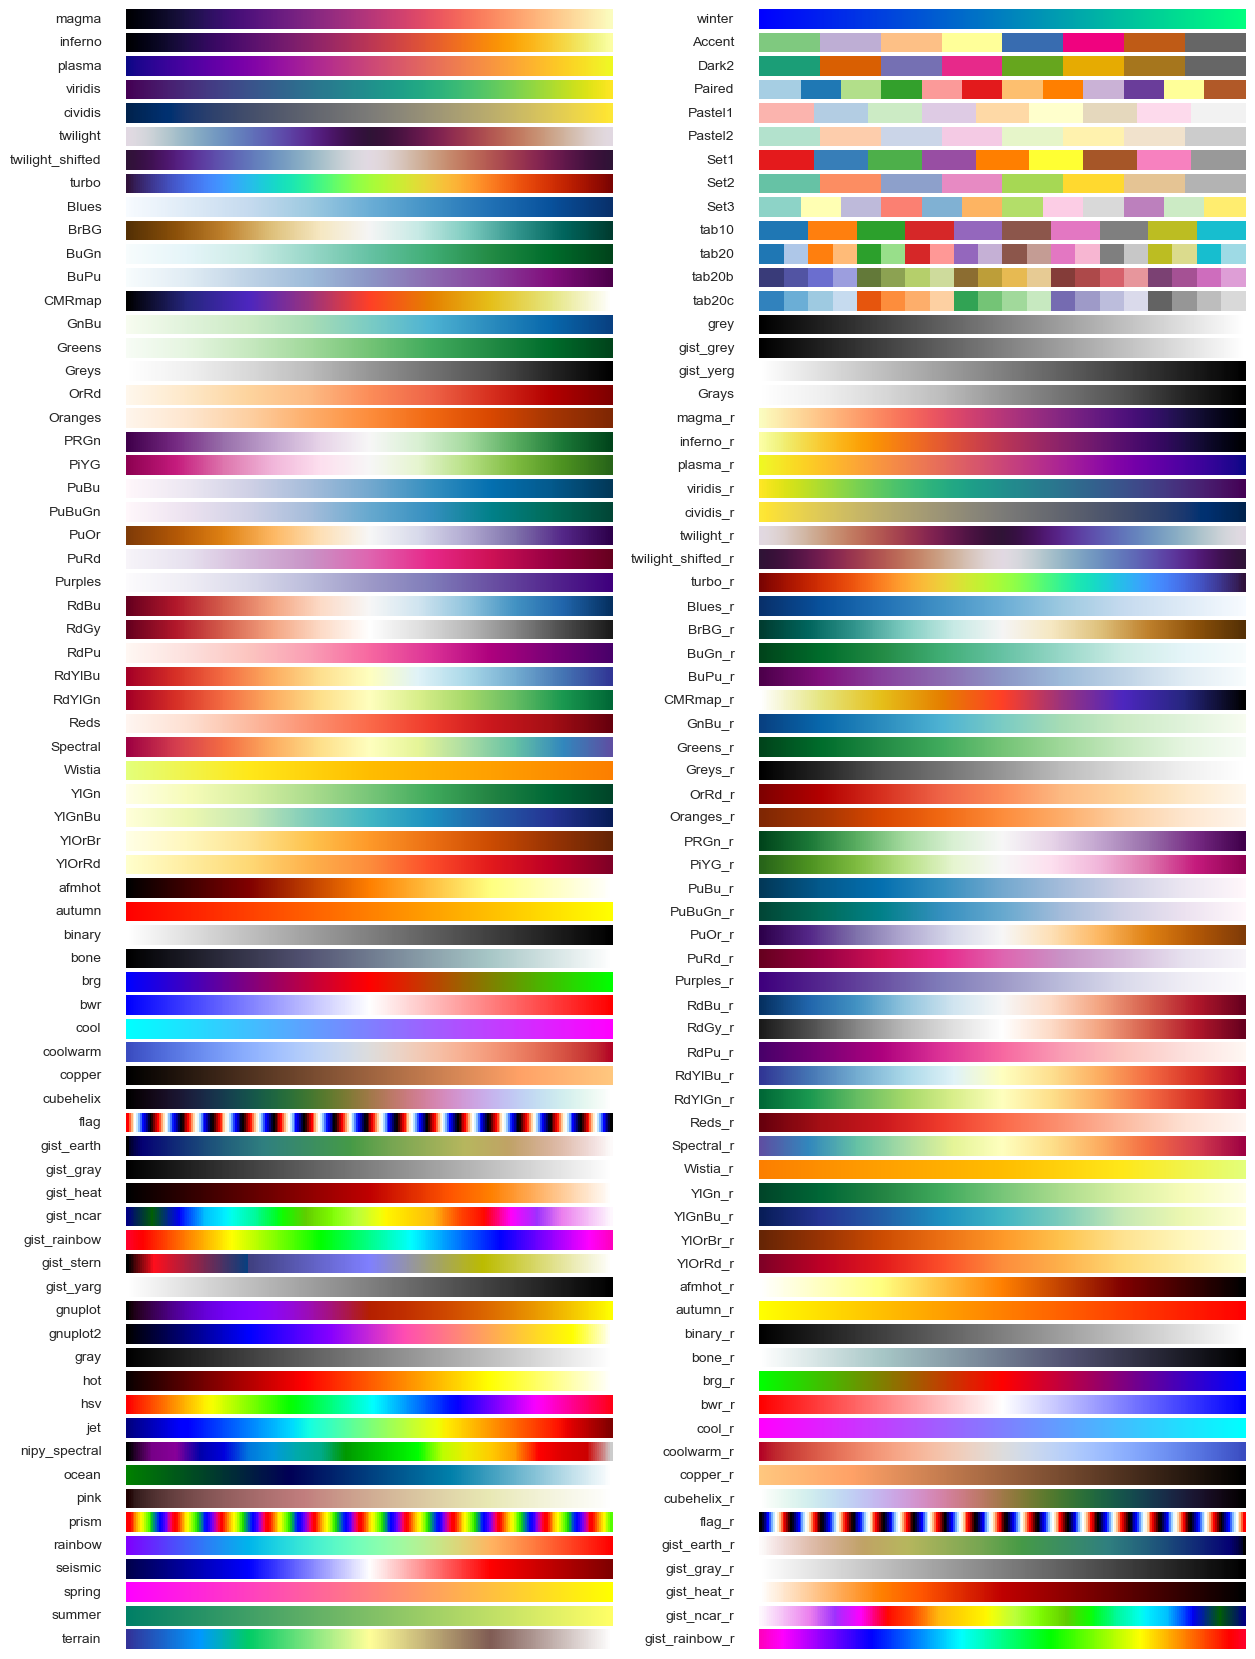

In [31]:
from colorspacious import cspace_converter

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, start_range=1, end_range=20):
    """
    Muestra paletas de colores en dos columnas por rangos
    
    Parámetros:
    -----------
    category : str
        Título de la categoría
    start_range : int
        Número inicial del rango (1-based, default: 1)
    end_range : int
        Número final del rango (inclusive, default: 20)
    """
    # Obtener lista de colormaps disponibles
    available_cmaps = list(mpl.colormaps)
    
    # Convertir a índices 0-based y seleccionar rango
    start_index = start_range - 1
    end_index = min(end_range, len(available_cmaps))
    selected_cmaps = available_cmaps[start_index:end_index]
    
    # Organizar en dos columnas - dividir la lista en mitades
    mid_point = (len(selected_cmaps) + 1) // 2
    left_column = selected_cmaps[:mid_point]
    right_column = selected_cmaps[mid_point:]
    
    # Número de filas = longitud de la columna más larga
    nrows = max(len(left_column), len(right_column))
    
    # Calcular altura de figura
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(14, figh))
    fig.subplots_adjust(top=0.95, bottom=0.15 / figh,
                        left=0.15, right=0.95, wspace=0.3)

    # Si solo hay una fila, asegurar que axs sea bidimensional
    if nrows == 1:
        axs = axs.reshape(1, -1)
    
    # Llenar columna izquierda
    for i in range(nrows):
        if i < len(left_column):
            name = left_column[i]
            ax_left = axs[i, 0]
            ax_left.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
            ax_left.text(-0.05, 0.5, name, va='center', ha='right', fontsize=10,
                        transform=ax_left.transAxes)
            ax_left.set_axis_off()
        else:
            # Ocultar ejes vacíos
            axs[i, 0].set_axis_off()
            axs[i, 0].set_visible(False)
    
    # Llenar columna derecha
    for i in range(nrows):
        if i < len(right_column):
            name = right_column[i]
            ax_right = axs[i, 1]
            ax_right.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
            ax_right.text(-0.05, 0.5, name, va='center', ha='right', fontsize=10,
                         transform=ax_right.transAxes)
            ax_right.set_axis_off()
        else:
            # Ocultar ejes vacíos
            axs[i, 1].set_axis_off()
            axs[i, 1].set_visible(False)

    # Guardar lista de colormaps para uso posterior
    cmaps[category] = selected_cmaps
    plt.show()

# Ejemplo de uso: del 1 al 20
plot_color_gradients('Paletas 1-20', start_range=1, end_range=140)

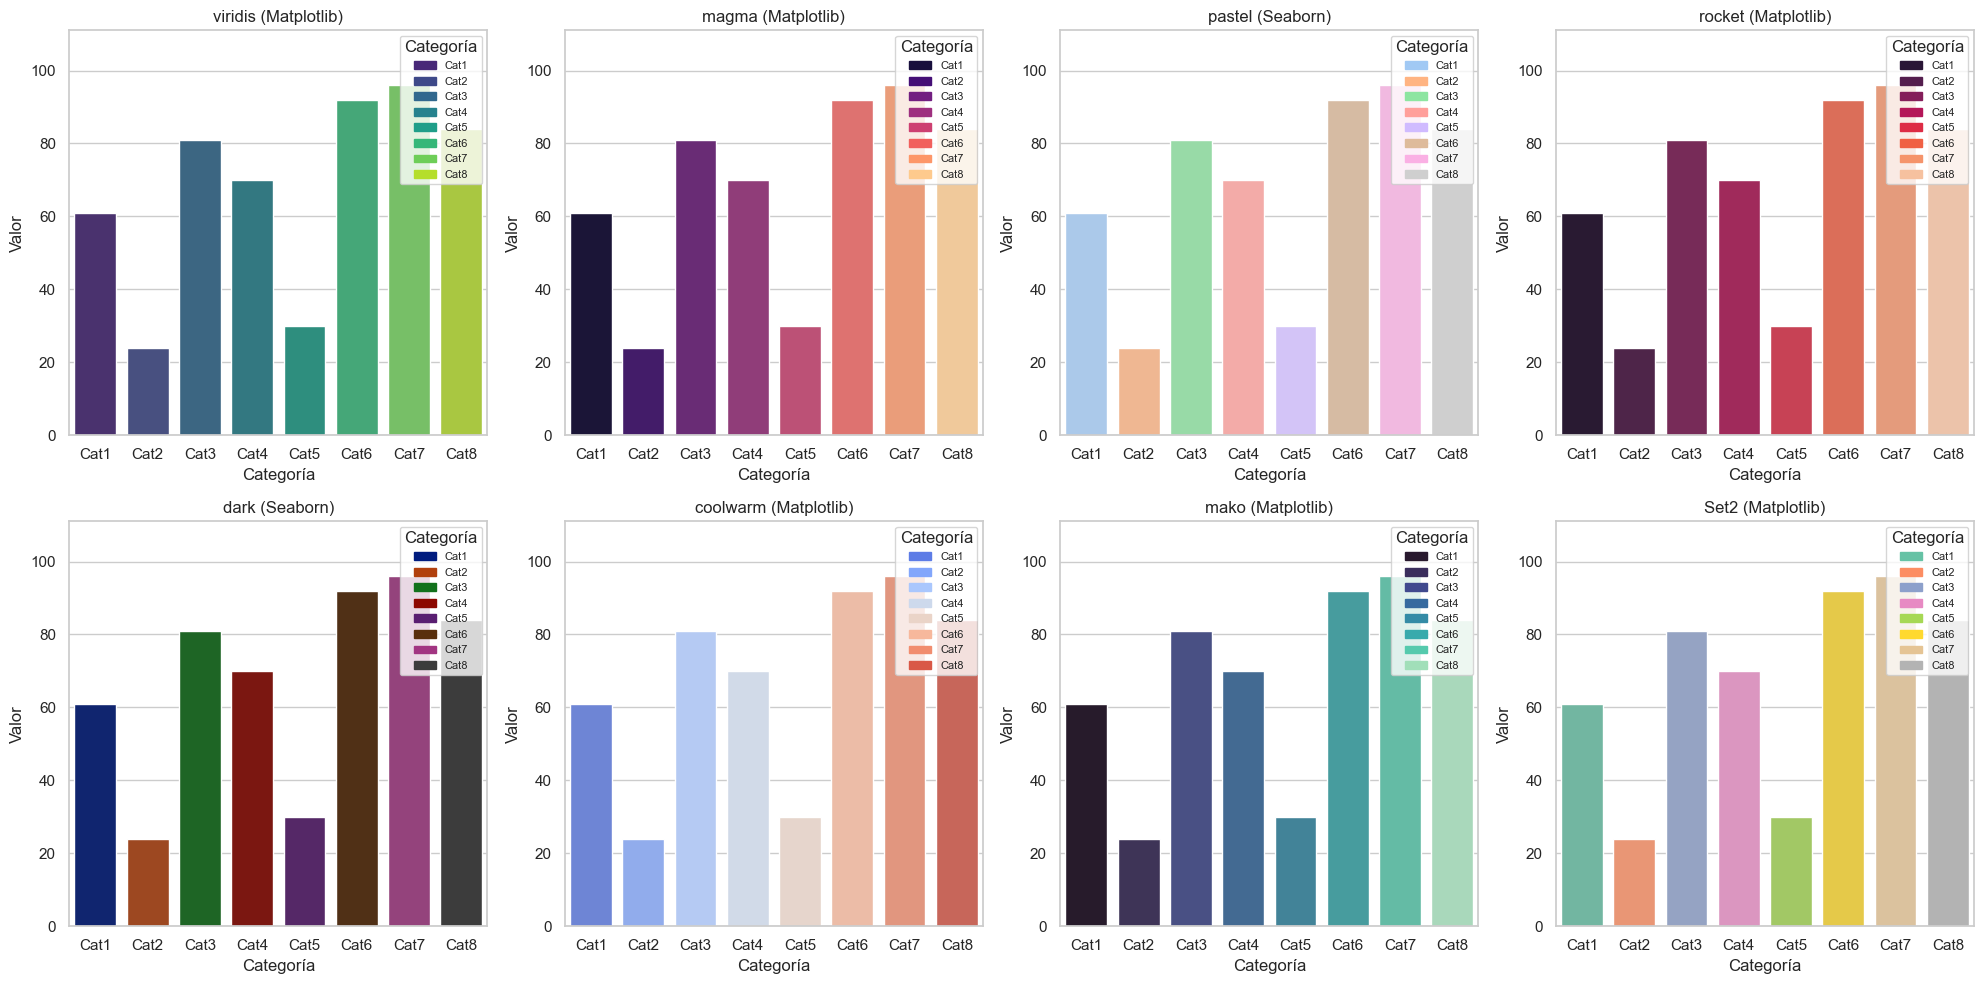

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Función para identificar el origen de una paleta
def identificar_origen(paleta):
    try:
        plt.get_cmap(paleta)
        return "Matplotlib"
    except ValueError:
        return "Seaborn"

# Función para graficar múltiples paletas con al menos 8 categorías
def mostrar_paletas_barras(paletas, datos=None):
    if datos is None:
        np.random.seed(42)
        categorias = [f'Cat{i}' for i in range(1, 9)]  # Al menos 8 barras
        valores = np.random.randint(10, 100, size=len(categorias))
        datos = pd.DataFrame({'Categoría': categorias, 'Valor': valores})

    sns.set(style="whitegrid")

    filas = (len(paletas) + 3) // 4
    fig, axes = plt.subplots(nrows=filas, ncols=4, figsize=(20, 5 * filas))
    axes = axes.flatten()

    for i, palette in enumerate(paletas):
        origen = identificar_origen(palette)
        try:
            sns.barplot(data=datos, x='Categoría', y='Valor', hue='Categoría', palette=palette, legend=False, ax=axes[i])
            axes[i].set_title(f'{palette} ({origen})', fontsize=12)
            axes[i].set_ylim(0, datos['Valor'].max() + 15)

            # Crear leyenda manualmente
            colores_usados = sns.color_palette(palette, len(datos['Categoría']))
            handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colores_usados]
            labels = datos['Categoría']
            axes[i].legend(handles, labels, title='Categoría', loc='upper right', fontsize=8)

        except Exception:
            axes[i].text(0.5, 0.5, f'Error con "{palette}"', ha='center', va='center', fontsize=10)
            axes[i].set_axis_off()

    for j in range(i + 1, len(axes)):
        axes[j].set_axis_off()

    plt.tight_layout()
    plt.show()

# 🎨 Paletas disponibles
paletas_matplotlib = sorted(plt.colormaps())  # Colormaps de Matplotlib
paletas_seaborn = [
    'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind',
    'rocket', 'mako', 'flare', 'crest', 'icefire'
]

# 🧪 Prueba con algunas paletas
ejemplo_paletas = ['viridis', 'magma', 'pastel', 'rocket', 'dark', 'coolwarm', 'mako', 'Set2']
mostrar_paletas_barras(ejemplo_paletas)

In [ ]:
import seaborn as sns

def obtener_paletas_validas_seaborn():
    posibles = [
        # Paletas categóricas
        'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind',
        # Paletas secuenciales
        'rocket', 'mako', 'flare', 'crest', 'icefire', 'vlag',
        # Paletas circulares
        'hls', 'husl',
        # Paletas diverging
        'coolwarm', 'Spectral', 'RdBu', 'BrBG',
        # Algunas de matplotlib que también acepta Seaborn
        'viridis', 'plasma', 'inferno', 'magma', 'cividis',
        # Sets comunes
        'Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2', 'tab10', 'tab20'
    ]

    validas = []
    for nombre in posibles:
        try:
            sns.color_palette(nombre, 8)  # Intenta obtener una paleta con 8 colores
            validas.append(nombre)
        except:
            continue
    return sorted(validas)

paletas_seaborn_validas = obtener_paletas_validas_seaborn()
print(paletas_seaborn_validas)

In [28]:
paletas_seaborn = [
    # Categóricas
    "deep", "muted", "bright", "pastel", "dark", "colorblind",
    "tab10", "tab20", "tab20b", "tab20c",
    "Set1", "Set2", "Set3", "Paired", "Accent", "Pastel1", "Pastel2", "Dark2",

    # Circulares
    "hls", "husl",

    # Secuenciales
    "rocket", "mako", "flare", "crest", "icefire",
    "viridis", "plasma", "inferno", "magma", "cividis",

    # Divergentes
    "coolwarm", "vlag", "Spectral", "BrBG", "RdBu", "PiYG", "PRGn", "RdYlBu", "RdYlGn",

    # Especiales (solo con sns.color_palette, no como sns.set_palette directamente)
    "cubehelix",
    "ch:start=.2,rot=-.3",         # Cubehelix modificada
    "light:#5A9_r",                # Paleta clara basada en color
    "dark:#5A9_r",                 # Paleta oscura basada en color
    "blend:#7fcdbb,#2c7fb8"        # Mezcla de dos colores
]

In [ ]:
sns.set_style("whitegrid")   # Fondo blanco con cuadrícula (muy usado)
sns.set_style("darkgrid")    # Fondo oscuro con cuadrícula gris
sns.set_style("white")       # Fondo blanco, sin cuadrícula
sns.set_style("dark")        # Fondo oscuro, sin cuadrícula
sns.set_style("ticks")       # Estilo minimalista con "ticks" (ejes discretos)